In [17]:
#Stock Price Prediction
#Predict stock price of top technology companies(Amazon, Facebook, Apple) by analysing their historic data.
#Predict price for 2017, 2018, 2019 & 2020 without social sentiment
#Predict price for 2017, 2018, 2019 & 2020 with social sentiment .
#Physically validate the stock price derived using option 1& 2 and conclude which is actually close to the current market prices.


In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import collections




#from sklearn.model_selection import train_test_split
#from sklearn import metrics
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.pipeline import Pipeline
#from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.svm import LinearSVC


from bs4 import BeautifulSoup
import requests



In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
#Get the data for amazon and create dataframe 
#Add company name as feature to the dataframe

import pandas as pd

data_amzn = pd.read_csv("/content/drive/MyDrive/Stock-Price-Prediction-main/AMZN.csv")

data_amzn.insert(0,'Stock','AMZN')

data_amzn.head(5)



,Stock,Date,Open,High,Low,Close,Adj Close,Volume
0,AMZN,2010-12-06,175.520004,178.429993,174.600006,178.050003,178.050003,5654200
1,AMZN,2010-12-07,180.500000,181.470001,176.570007,176.770004,176.770004,5077100
2,AMZN,2010-12-08,177.490005,178.160004,175.199997,176.289993,176.289993,3726900
3,AMZN,2010-12-09,177.770004,178.110001,173.800003,174.850006,174.850006,4555500
4,AMZN,2010-12-10,174.880005,175.949997,173.360001,175.619995,175.619995,3565500


In [21]:
#Get the data for google and create dataframe 
#Add company name as feature to the dataframe


data_goog = pd.read_csv("/content/drive/MyDrive/Stock-Price-Prediction-main/GOOG.csv")

data_goog.insert(0,'Stock','GOOG')

data_goog.head(5)

,Stock,Date,Open,High,Low,Close,Adj Close,Volume
0,GOOG,2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
1,GOOG,2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2,GOOG,2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
3,GOOG,2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
4,GOOG,2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900


In [22]:
#Get the data for facebook and create dataframe 
#Add company name as feature to the dataframe


data_fb = pd.read_csv("/content/drive/MyDrive/Stock-Price-Prediction-main/FB.csv")

data_fb.insert(0,'Stock','FB')

data_fb.head(5)

,Stock,Date,Open,High,Low,Close,Adj Close,Volume
0,FB,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
1,FB,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2,FB,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
3,FB,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
4,FB,2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,37149800


In [23]:
#Get the data for apple and create dataframe 
#Add company name as feature to the dataframe


data_aapl = pd.read_csv("/content/drive/MyDrive/Stock-Price-Prediction-main/AAPL.csv")

data_aapl.insert(0,'Stock','APPL')

data_aapl.head(5)

,Stock,Date,Open,High,Low,Close,Adj Close,Volume
0,APPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.539882,493729600
1,APPL,2010-01-05,7.664286,7.699643,7.616071,7.656428,6.551187,601904800
2,APPL,2010-01-06,7.656428,7.686786,7.526786,7.534643,6.446983,552160000
3,APPL,2010-01-07,7.562500,7.571429,7.466072,7.520714,6.435065,477131200
4,APPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.477847,447610800


In [24]:
#Merge the data_amzn, data_goog, data_fb , data_aapl into single dataframe

data = pd.concat([data_amzn, data_goog, data_fb , data_aapl])
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10174 entries, 0 to 2751
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Stock      10174 non-null  object 
 1   Date       10174 non-null  object 
 2   Open       10174 non-null  float64
 3   High       10174 non-null  float64
 4   Low        10174 non-null  float64
 5   Close      10174 non-null  float64
 6   Adj Close  10174 non-null  float64
 7   Volume     10174 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 715.4+ KB


,Stock,Date,Open,High,Low,Close,Adj Close,Volume
0,AMZN,2010-12-06,175.520004,178.429993,174.600006,178.050003,178.050003,5654200
1,AMZN,2010-12-07,180.500000,181.470001,176.570007,176.770004,176.770004,5077100
2,AMZN,2010-12-08,177.490005,178.160004,175.199997,176.289993,176.289993,3726900
3,AMZN,2010-12-09,177.770004,178.110001,173.800003,174.850006,174.850006,4555500
4,AMZN,2010-12-10,174.880005,175.949997,173.360001,175.619995,175.619995,3565500


In [25]:
# 2 Data Cleaning : Detecting Missing Values or any other Data Quality Issue
#Column Name
#Data Type (numeric, categorical, timestamp, etc)
#Description of Column
#Count or percent per unique values or codes (including NA)
#The range of values or codes
#Check datatypes.
#Changing the OBJECT datatype
data['Stock'].astype(str)
data['Date']= pd.to_datetime(data['Date'])
print(data.dtypes)

Stock                object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [26]:
# 2 Data Cleaning : Detecting Missing Values or any other Data Quality Issue
# To find if there is any missing values in complete data True: Yes there is & False : No there is no missing value?
print("Any missing/NULL value True/False: ", data.isnull().values.any())

#Sum of NULL or Missing values in dataframe across all col.
data.isnull().sum()
print("Datatype of Stock : ", type('Stock'))

Any missing/NULL value True/False:  False
Datatype of Stock :  <class 'str'>


In [27]:
#summary stats table transposed for df
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,10174.0,4.532375e+02,5.849921e+02,6.870357,4.647437e+01,2.176500e+02,6.269250e+02,3.547000e+03
High,10174.0,4.578021e+02,5.914537e+02,7.000000,4.700000e+01,2.200750e+02,6.330195e+02,3.552250e+03
Low,10174.0,4.483430e+02,5.778189e+02,6.794643,4.602063e+01,2.144900e+02,6.204775e+02,3.486690e+03
Close,10174.0,4.532568e+02,5.848480e+02,6.858929,4.649563e+01,2.177950e+02,6.271725e+02,3.531450e+03
Adj Close,10174.0,4.527488e+02,5.852179e+02,5.868809,4.514413e+01,2.177950e+02,6.271725e+02,3.531450e+03
Volume,10174.0,8.626607e+07,1.717145e+08,7900.000000,3.092100e+06,8.771950e+06,8.822075e+07,1.880998e+09


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

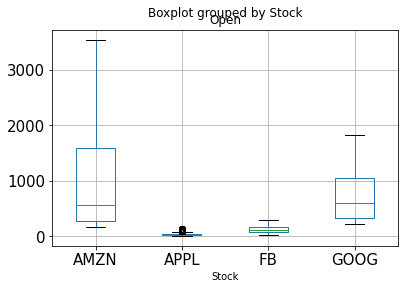

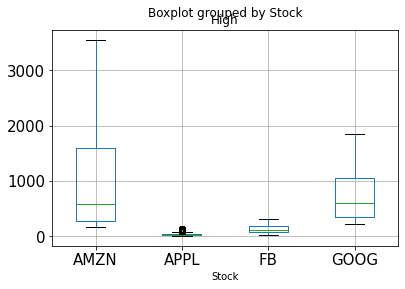

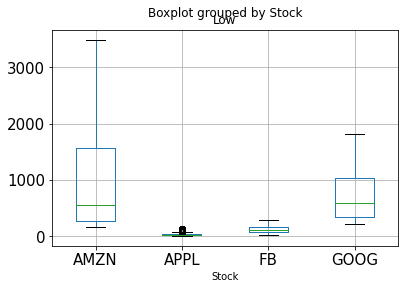

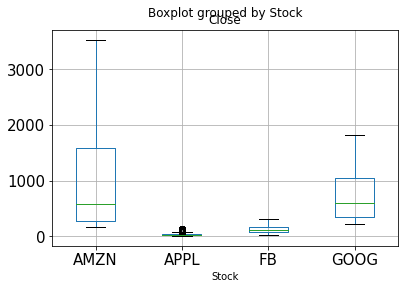

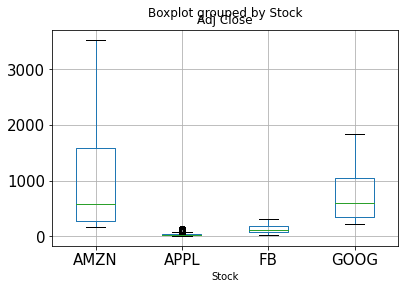

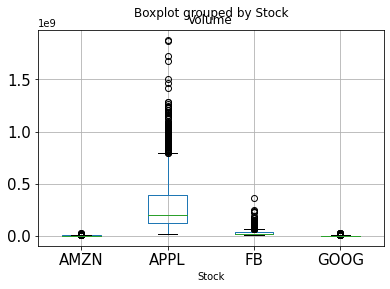

In [35]:
data.boxplot(column='Open',by='Stock',grid=True, vert=True,fontsize=15)
data.boxplot(column='High',by='Stock',grid=True, vert=True,fontsize=15)
data.boxplot(column='Low',by='Stock',grid=True, vert=True,fontsize=15)
data.boxplot(column='Close',by='Stock',grid=True, vert=True,fontsize=15)
data.boxplot(column='Adj Close',by='Stock',grid=True, vert=True,fontsize=15)
data.boxplot(column='Volume',by='Stock',grid=True, vert=True,fontsize=15)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc26b527cd0>,
      dtype=object)

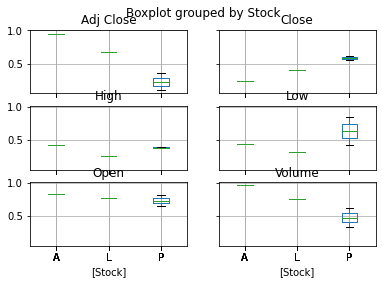

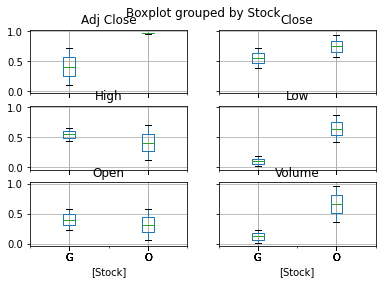

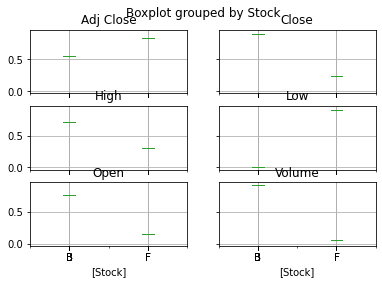

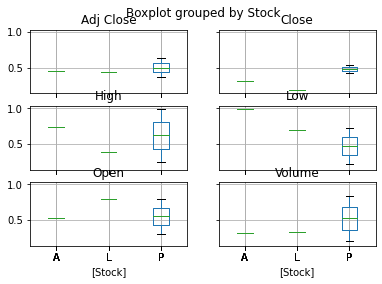

In [9]:


df = pd.DataFrame(np.random.rand(12,6), columns=['Open', 'High','Low', 'Close','Adj Close', 'Volume'] )
df['Stock'] = pd.Series(list('APPL'))
df.boxplot(by='Stock')

df = pd.DataFrame(np.random.rand(12,6), columns=['Open', 'High','Low', 'Close','Adj Close', 'Volume'] )
df['Stock'] = pd.Series(list('GOOG'))
df.boxplot(by='Stock')

df = pd.DataFrame(np.random.rand(12,6), columns=['Open', 'High','Low', 'Close','Adj Close', 'Volume'] )
df['Stock'] = pd.Series(list('FB'))
df.boxplot(by='Stock')

df = pd.DataFrame(np.random.rand(12,6), columns=['Open', 'High','Low', 'Close','Adj Close', 'Volume'] )
df['Stock'] = pd.Series(list('APPL'))
df.boxplot(by='Stock')

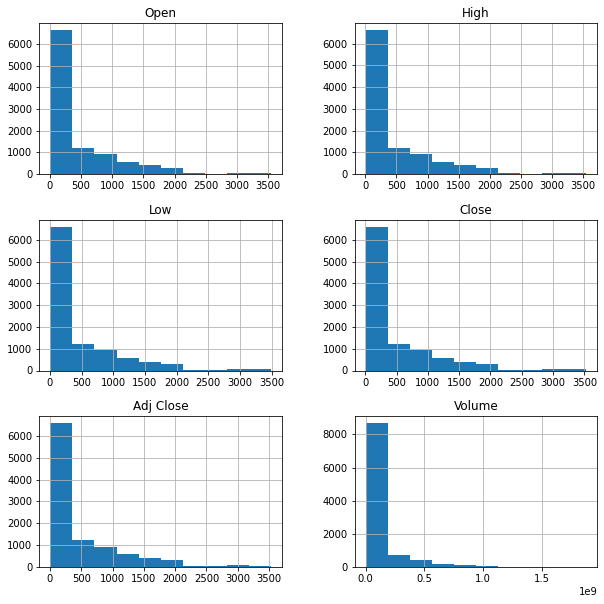

In [ ]:
#histograms for each variable in df
hist = data.hist(bins=10,figsize =(10,10))

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10174 entries, 0 to 2751
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Stock      10174 non-null  object        
 1   Date       10174 non-null  datetime64[ns]
 2   Open       10174 non-null  float64       
 3   High       10174 non-null  float64       
 4   Low        10174 non-null  float64       
 5   Close      10174 non-null  float64       
 6   Adj Close  10174 non-null  float64       
 7   Volume     10174 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 715.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10174 entries, 0 to 2751
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Stock      10174 non-null  object        
 1   Date       10174 non-null  datetime64[ns]
 2   Open       10174 non-null  float64      

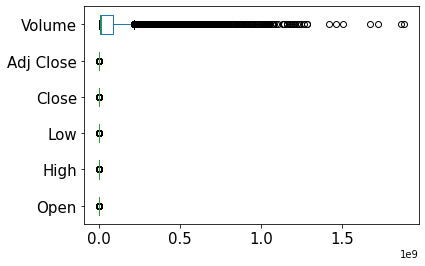

In [ ]:
#create a boxplot for every column in df
#Reviewing for Outliers and Anamolies
boxplot = data.boxplot(grid=False, vert=False,fontsize=15)

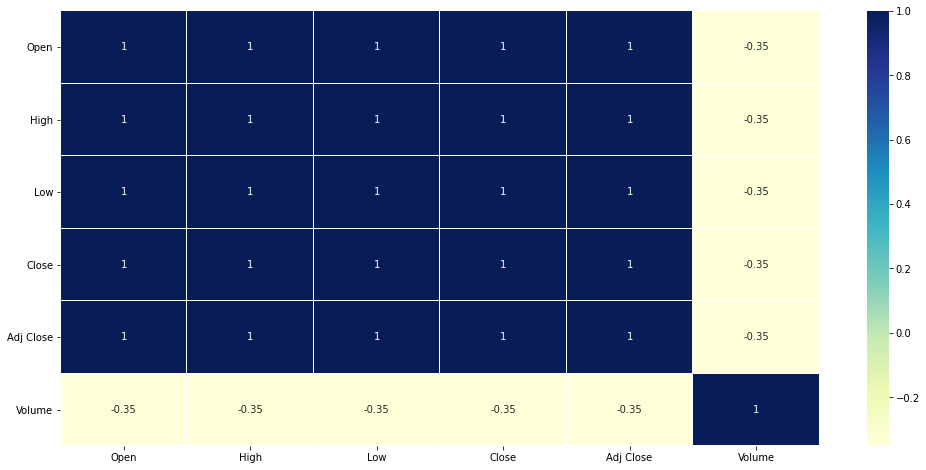

In [ ]:
#DATA RELATIONSHIPS

#create the correlation matrix heat map
plt.figure(figsize=(17,8))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

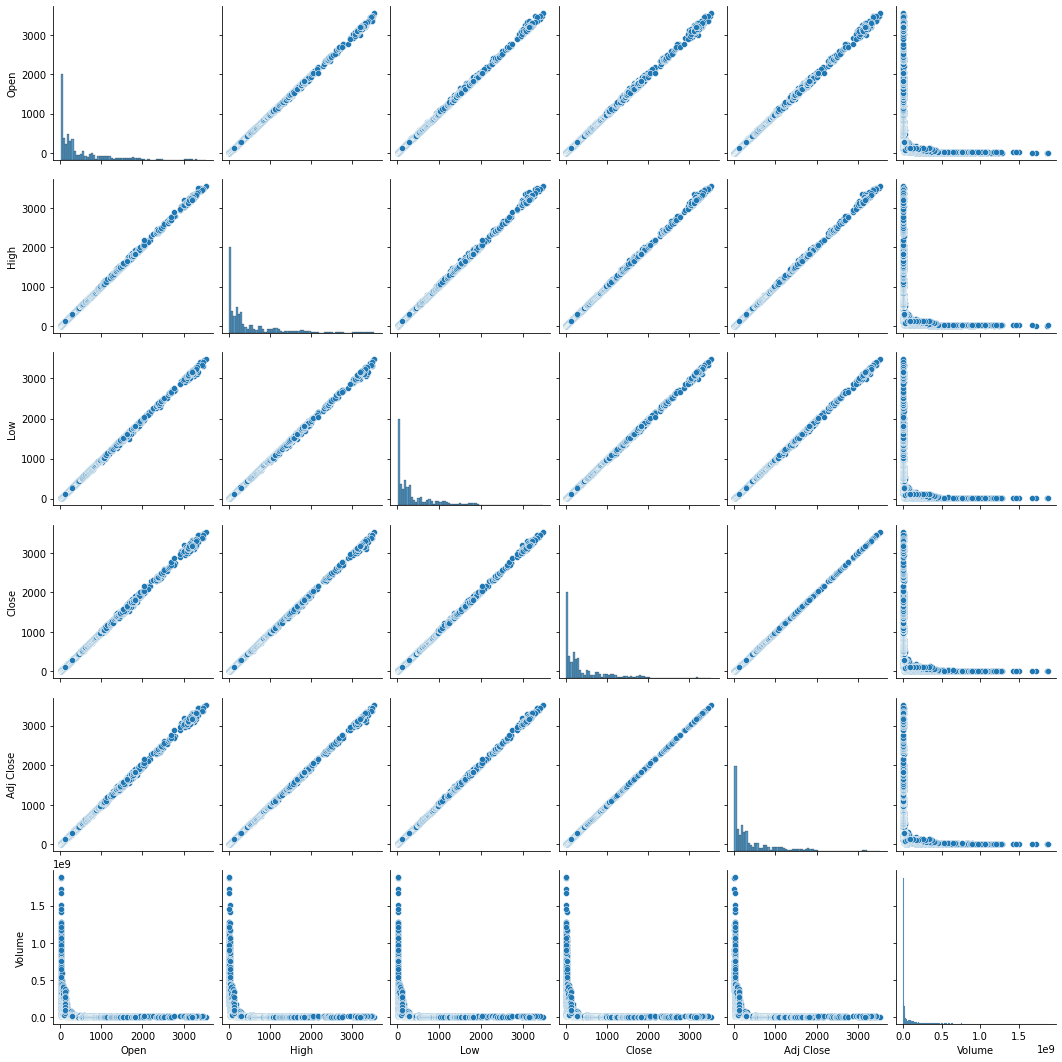

In [ ]:
#pair plots : Another way to evaluate the variable distributions against each other is with the 
#seaborn pair plots function
g = sns.pairplot(data)

In [ ]:
#3. IDENTIFYING AND CREATING FEATURES
#The goal of identifying features is to use your 
#exploratory work to isolate features that will be most helpful in constructing a predictive model.
#Building a Principle Components Analysis (PCA) is a useful way to apply a dimension reduction application to 
#identify which features contain the most amount of variation within your development dataset

#Let's select our features
x = data.loc[:,'High':'Volume']
y = data.loc[:,'Date']


In [ ]:
x.head()

,High,Low,Close,Adj Close,Volume
0,178.429993,174.600006,178.050003,178.050003,5654200
1,181.470001,176.570007,176.770004,176.770004,5077100
2,178.160004,175.199997,176.289993,176.289993,3726900
3,178.110001,173.800003,174.850006,174.850006,4555500
4,175.949997,173.360001,175.619995,175.619995,3565500


In [ ]:
y.head()

0   2010-12-06
1   2010-12-07
2   2010-12-08
3   2010-12-09
4   2010-12-10
Name: Date, dtype: datetime64[ns]

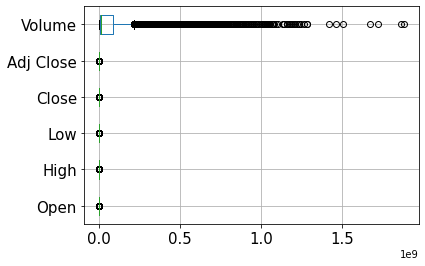

In [ ]:
#create a boxplot for every column in df
boxplot = data.boxplot(grid=True, vert=False,fontsize=15)